In [33]:
import requests
import json
import pandas as pd

In [34]:
class NewsItem():
    def __init__(self, newsid, title, linkurl, bucketgrpids, metrics):
        self.newsid=newsid
        self.title=title
        self.linkurl=linkurl
        self.bucketgrpids=bucketgrpids
        self.bucketgrpids=bucketgrpids
        self.content=''
        self.getflag=False

In [35]:
news_list=[]
groups=['null']
group_names=['未指定']
group_counts=[0]
for index in range(5):
    r=requests.get(f'https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID={index*100}&len=100')
    response=r.text
    # print(response)
    data=json.loads(response)
    for news in data['items']:
        bucketgrpids=[]
        try:
            bucketgrpids = news['bucketgrpids']
        except:
            bucketgrpids=['null']
        news_list.append(NewsItem(news['newsid'],news['title'],news['linkurl'],bucketgrpids,news['metrics']))
    for group in data['groupMap']:
        group=data['groupMap'][group]
        try:
            group_index=groups.index(group['groupid'])
        except:
            group_index=-1
        if group_index==-1:
            groups.append(group['groupid'])
            group_names.append(group['name'])
            group_counts.append(0)

In [36]:
for news in news_list:
    for group in news.bucketgrpids:
        group_index=groups.index(group)
        group_counts[group_index]=group_counts[group_index]+1

   groups  count
0     未指定    176
1    3C達人     51
2    親子家庭    106
3    城市食旅     29
4    健身瘦身     45
5    御宅學園     20
6      遊戲      9
7    享樂女性     77
8    文青聚落     20
9    國際財經     31
10   職場白領     64
11     商業     98
12     生活    136
13     科技     98
14     運動      7
15     設計      8


([<matplotlib.patches.Wedge at 0x19bd9dc5898>,
 [Text(-0.599103,0.922538,'null'),
  Text(-1.06526,0.274256,'3CExpert_tw'),
  Text(-1.06252,-0.284701,'Babyhome_tw'),
  Text(-0.83878,-0.711652,'CityTour_tw'),
  Text(-0.643648,-0.89203,'Fitness_tw'),
  Text(-0.440824,-1.00781,'GamePlayer_tw'),
  Text(-0.34334,-1.04504,'Game_tw'),
  Text(-0.0395886,-1.09929,'Hedonism_tw'),
  Text(0.305507,-1.05672,'Hipster_tw'),
  Text(0.476809,-0.991289,'InternationalFinance_tw'),
  Text(0.75719,-0.797912,'WhiteCollar_tw'),
  Text(1.05672,-0.305507,'business_tw'),
  Text(0.973486,0.512176,'life_tw'),
  Text(0.346758,1.04392,'tech_tw')],
 [Text(-0.326783,0.503202,'18.3%'),
  Text(-0.581052,0.149594,'5.3%'),
  Text(-0.579555,-0.155291,'11.0%'),
  Text(-0.457516,-0.388174,'3.0%'),
  Text(-0.351081,-0.486562,'4.7%'),
  Text(-0.240449,-0.549713,'2.1%'),
  Text(-0.187277,-0.570024,'0.9%'),
  Text(-0.0215938,-0.599611,'8.0%'),
  Text(0.16664,-0.576395,'2.1%'),
  Text(0.260078,-0.540703,'3.2%'),
  Text(0.413013,-

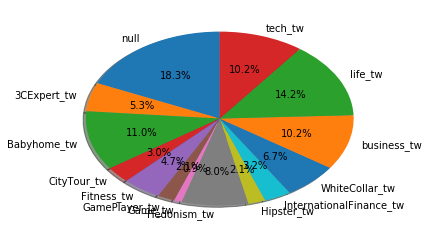

In [56]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

group_count = {}
for name, count in zip(groups, group_counts):
    if group not in group_count:
        group_count[name]=count

plt.pie(group_count.values(), labels=group_count.keys(), autopct='%1.1f%%', shadow=True, startangle=90)

In [57]:
#Day35
import _thread
import time
def get_content(news):
    r=requests.get(news.linkurl)
    response=r.text
    news.content=response
    news.getflag=True
    
for news in news_list:
    _thread.start_new_thread(get_content, (news,))
    
while True:
    count=0
    time.sleep(3)
    for news in news_list:
        if news.getflag==False:
            count=count+1
    print(count)
    if count==0:
        break

2
2
1
1
1
1
1
1
1
1
1
0
